<a href="https://colab.research.google.com/github/MASTERJEDI2000/MIS-ARCHIVOS-DE-COLLAB/blob/main/11vaSesio%CC%81n09Marzo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ESTADISTICA APLICADA

---

ALEJANDRO MANUEL NIETO DELGADO

1884116

09 de Marzo de 2023

11va Sesión


---




In [ ]:
#Importamos las librerias.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
!pip install lifelines

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.7/349.7 KB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 KB 8.3 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4048 sha256=179b31004dbe2984de567b7e74609a0cb937057caa9a55b716fa00296ded9682
  Stored in directory: /root/.cache/pip/wheels/a8/03/64/8557323821d25118c3a2dc1646996f7a962a8970d4b7d22473
Successfully built autograd-gamma


In [ ]:
#Importar librerias de lifelines.
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test
from lifelines import CoxPHFitter

In [ ]:
#Leemos la base de datos.
relacion = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/km_relacion.csv')

In [ ]:
relacion.head()

,tratamiento,t,estado
0,0,1,1
1,0,1,1
2,0,2,1
3,0,2,1
4,0,3,1




---


*La base de datos consiste en 42 observaciones. Es de un experimento, donde se dividio a las observaciones en dos grupos. Es decir, cada uno de 21 observaciones.*

* VARIABLES:
  * **tratamiento**: 1 les toco ser detallistas (dar un regalo en el transcurso de la semana) dentro en la relación, 0 no son detallistas.
  * **t (tiempo)**: tiempo de la relación en semanas.
  * **Estados**: refiere a 1 si  se termino la relación y 0 si esta censurado.

**Hipótesis**
La relación dura más si las personas son detallistas respectivamente con su pareja.

In [ ]:
#Pedimos las Estadisticas descriptivas
relacion.describe()

,tratamiento,t,estado
count,42.000000,42.000000,42.000000
mean,0.500000,12.880952,0.714286
std,0.506061,9.347498,0.457230
min,0.000000,1.000000,0.000000
25%,0.000000,6.000000,0.000000
50%,0.500000,10.500000,1.000000
75%,1.000000,18.500000,1.000000
max,1.000000,35.000000,1.000000


In [ ]:
#Estadisticas descriptivas por método 1
relacion.groupby('tratamiento').describe()

t                                                  estado  \
            count       mean       std  min  25%   50%   75%   max  count   
tratamiento                                                                 
0            21.0   8.666667  6.467869  1.0  4.0   8.0  12.0  23.0   21.0   
1            21.0  17.095238  9.999524  6.0  9.0  16.0  23.0  35.0   21.0   

                                                          
                 mean       std  min  25%  50%  75%  max  
tratamiento                                               
0            1.000000  0.000000  1.0  1.0  1.0  1.0  1.0  
1            0.428571  0.507093  0.0  0.0  0.0  1.0  1.0

In [ ]:
#Estadisticas descriptivas por método 2
relacion.groupby('tratamiento').agg(['mean','std', 'count'])

t                    estado                
                  mean       std count      mean       std count
tratamiento                                                     
0             8.666667  6.467869    21  1.000000  0.000000    21
1            17.095238  9.999524    21  0.428571  0.507093    21



```
Kapplan Meier
```



In [ ]:
#Separamos el grupo dependiendo del tratamiento
detallistas = relacion.query('tratamiento==1')
no_detallistas = relacion.query('tratamiento==0')

In [ ]:
#Visualizaciión del tratamiento para detallistas
detallistas

,tratamiento,t,estado
21,1,6,1
22,1,6,1
23,1,6,1
24,1,6,0
25,1,7,1
26,1,9,0
27,1,10,1
28,1,10,0
29,1,11,0
30,1,13,1


In [ ]:
#Visualizaciión del tratamiento para los no detallistas
no_detallistas

,tratamiento,t,estado
0,0,1,1
1,0,1,1
2,0,2,1
3,0,2,1
4,0,3,1
5,0,4,1
6,0,4,1
7,0,5,1
8,0,5,1
9,0,8,1


In [ ]:
#Kaplan Meier
km_d = KaplanMeierFitter().fit(detallistas['t'],detallistas['estado'])
km_nd = KaplanMeierFitter().fit(no_detallistas['t'],no_detallistas['estado'])

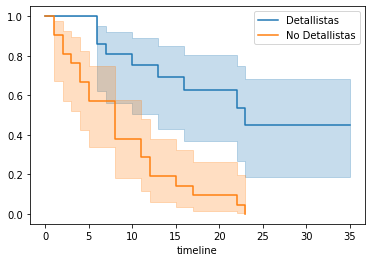

In [ ]:
#Visualizamos las funciones
km_d.plot_survival_function(label='Detallistas')
km_nd.plot_survival_function(label='No Detallistas')
plt.show();

Cuando las gráficas se traslapan es necesario visualizar que tienen funciones de supervivencia distintas.

In [ ]:
#Low Rank Test
lrt = logrank_test(detallistas['t'], detallistas['estado'], no_detallistas['t'], no_detallistas['estado'])
lrt.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          42.45 <0.005     33.68

* **H0 : Funciones supervivencia iguales.**
* **HA : Funciones de supervivencia distintas.**

*A un nivel de confianza de 95% o nivel de significancia del 5% se rechaza H0, por lo tanto las funciones de supervivencia ségun sea el tratamiento [detallistas, no detallistas], son distintas.*

---




---



```
MÉTODO COX 
```



In [ ]:
#Aplicamos el método no parametrico Cox 
cph = CoxPHFitter().fit(relacion,'t','estado')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 42 total observations, 12 right-censored observations>
             duration col = 't'
                event col = 'estado'
      baseline estimation = breslow
   number of observations = 42
number of events observed = 30
   partial log-likelihood = -85.01
         time fit was run = 2023-03-09 21:39:28 UTC

---
              coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                           
tratamiento  -1.57       0.21       0.41            -2.38            -0.76                 0.09                 0.47

              cmp to     z      p   -log2(p)
covariate                                   
tratamiento     0.00 -3.81 <0.005      12.83
---
Concordance = 0.69
Partial AIC = 172.02
log-likelihood ratio test = 16.35 on 1 df
-log2(p) of ll-ratio test = 14.21

Ser detallista disminuye el riesgo de que ocurra el evento. En este caso el evento se refiere a que termine la relación.

**$1-exp(coef) = 1- 0.21 = 0.79\%$**

Por lo tanto, en promedio alguien que es detallista tiene 79% menos riesgo de que termine la relación en comparación con la contraparte de que en la relación no sea detallista.